In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/ARC_heuristic/PlotsPaper/')
print(os.getcwd())

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1b0U2fABpE8D898NvKTrvvqqusm1peAQH/ARC_heuristic/PlotsPaper


final values (0.9949850170633444,0.9950130225524203), (0.999,0.9441347940290858), (0.8915229539959328,0.8931572021459662), (0.9479956052624166,0.9312685642820208)
[0, 1, 1, 0, 2, 3, 3, 2, 4, 4, 0, -1, 5, 9, 0, 6, 6, 5, 2, 7, 5, 4]
twoCurves X: [1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 12, 13, 13, 14, 15, 16]


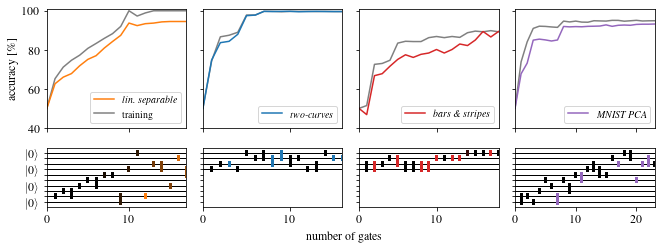

In [3]:
# PlotAcc_TA_paper.py
import numpy as np
import pylab as plt
from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec
from matplotlib.path import Path
import matplotlib.colors
import array

import matplotlib as mpl

mpl.rcParams.update({'text.usetex':True,'font.size': 12, 'font.family': 'serif', 'font.serif': ['Times', 'Computer Modern']})



def readGate(gateFile,cutoff='nan'):
	qubit = []	#id of the used qubit
	weight = []	#weight by which the angle is rotated
	layer = []	#in which layer a gate is occupied (important for gates that act on two qubits)
	gateData = open(gateFile,'r')
	layer_collect = 1
	count = 0
	for data in gateData:
		if count == cutoff:
			break
		line = data.split('\t')
		for l in range(len(line)-2):
			if line[l] == '111111': pass
			else:
				qubit.append(l)
				layer.append(layer_collect)
				weight.append(float(line[-2]))
				if line[l] == 'Rxx_x' or line[l] == 'Ryy_x' or line[l] == 'Rzz_x':
					qubit.append(l-1)
					layer.append(layer_collect)
					weight.append(float(line[-2]))
				layer_collect+=1
		if cutoff == 'nan': pass
		else:count+=1
	return [qubit,weight,layer]

#import data
#bars-and-stripes
path = 'Data_TA/BS/'
test0 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
barsStripes = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
barsStripes_train = [test0,test1,(test0+test1)*0.5]
barsStripes_qubit,barsStripes_weight,barsStripes_layer = readGate(path+'Gate_collect.txt','nan')

#linearly-separable 10d
path = 'Data_TA/LS/'
test0 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
linearSep10d = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=0,skip_header=1)[:94]
test1 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=1,skip_header=1)[:94]
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
linearSep10d_train = [test0,test1,(test0+test1)*0.5]
linearSep10d_qubit,linearSep10d_weight,linearSep10d_layer = readGate(path+'Gate_collect.txt','nan')

#two-curves 10d
path = 'Data_TA/TC/'

test0 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
twoCurves10d = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=0,skip_header=1)[:67]
test1 = np.genfromtxt(path+'ACC_train_SVM.txt',usecols=1,skip_header=1)[:67]
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
twoCurves10d_train = [test0,test1,(test0+test1)*0.5]
twoCurves10d_qubit,twoCurves10d_weight,twoCurves10d_layer = readGate(path+'Gate_collect.txt','nan')


#mnist-pca
path = 'Data_TA/MN/'
test0 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_1000_SVM_gridNum19_C_tuning_cv20.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
mnistPca = [test0,test1,(test0+test1)*0.5]
test0 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_train_1000_SVM.txt',usecols=1,skip_header=1)
test0 = np.array([0.5,*test0])
test1 = np.array([0.5,*test1])
mnistPca_train = [test0,test1,(test0+test1)*0.5]
mnistPca_qubit,mnistPca_weight,mnistPca_layer = readGate(path+'Gate_collect_1000_10d.txt','nan')


fig = plt.figure(figsize = (11.69*0.8,8.27*0.45))
gs = gridspec.GridSpec(2,4,height_ratios=[2,1])


ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharey=ax1)
ax3 = plt.subplot(gs[2],sharey=ax1)
ax4 = plt.subplot(gs[3],sharey=ax1)
ax5 = plt.subplot(gs[4],sharex=ax1)
ax6 = plt.subplot(gs[5],sharex=ax2,sharey=ax5)
ax7 = plt.subplot(gs[6],sharex=ax3,sharey=ax5)
ax8 = plt.subplot(gs[7],sharex=ax4,sharey=ax5)

ax = [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]]

ax1.plot(np.linspace(0,len(linearSep10d[2])-1,len(linearSep10d[2])),linearSep10d[2]*100,
	'-',color='tab:orange',zorder=1,label=r'\textit{lin. separable}')#,fillstyle='none')
ax2.plot(np.linspace(0,len(twoCurves10d[2])-1,len(twoCurves10d[2])),twoCurves10d[2]*100,
	'-',color='tab:blue',zorder=1,label=r'\textit{two-curves}')#,fillstyle='none')
ax3.plot(np.linspace(0,len(barsStripes[2])-1,len(barsStripes[2])),barsStripes[2]*100,
	'-',color='tab:red',zorder=1,label=r'\textit{bars \& stripes}')#,fillstyle='none')
ax4.plot(np.linspace(0,len(mnistPca[2])-1,len(mnistPca[2])),mnistPca[2]*100,
	'-',color='tab:purple',zorder=1,label=r'\textit{MNIST PCA}')#,fillstyle='none')


ax1.plot(np.linspace(0,len(linearSep10d_train[2])-1,len(linearSep10d_train[2])),linearSep10d_train[2]*100,
	'-',label='training',color='grey',zorder=0)#,fillstyle='none')
ax2.plot(np.linspace(0,len(twoCurves10d_train[2])-1,len(twoCurves10d_train[2])),twoCurves10d_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')
ax3.plot(np.linspace(0,len(barsStripes_train[2])-1,len(barsStripes_train[2])),barsStripes_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')
ax4.plot(np.linspace(0,len(mnistPca_train[2])-1,len(mnistPca_train[2])),mnistPca_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')

print(f'final values ({twoCurves10d_train[2][-1]},{twoCurves10d[2][-1]}), ({linearSep10d_train[2][-1]},{linearSep10d[2][-1]}), ({barsStripes_train[2][-1]},{barsStripes[2][-1]}), ({mnistPca_train[2][-1]},{mnistPca[2][-1]})')


verts = [
	(0.5,-1), #lower right
    (-0.5,-1), #lower left
    (-0.5,1), #upper left
    (0.5,1), #upper right
    (0.5,-1),
	]

codes = [
    Path.MOVETO, #begin the figure in the lower right
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

symbol = Path(verts,codes)


cvals = [min(twoCurves10d_weight),max(twoCurves10d_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:blue']))
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(linearSep10d_weight),max(linearSep10d_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:orange']))
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(barsStripes_weight),max(barsStripes_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:red']))
cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(mnistPca_weight),max(mnistPca_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:purple']))
cmap4 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)


def reduceQubits(qubit,maxQubit):
	diff_qubits = []
	for i in range(len(qubit)):
		if qubit[i] == -1: qubit[i] = maxQubit
		if qubit[i] in diff_qubits: pass
		else: diff_qubits.append(qubit[i])
	diff_qubits = np.sort(np.array(diff_qubits))
	for i in range(len(qubit)):
		idx = np.where(np.isclose(diff_qubits,qubit[i]))
		qubit[i] = idx
	n_qubits = len(diff_qubits)
	return [qubit,n_qubits]

print(linearSep10d_qubit)
twoCurves10d_qubit,n_twoCurves10d_qubit = reduceQubits(twoCurves10d_qubit,10)
linearSep10d_qubit,n_linearSep10d_qubit = reduceQubits(linearSep10d_qubit,10)
barsStripes_qubit,n_barsStripes_qubit = reduceQubits(barsStripes_qubit,16)
mnistPca_qubit,n_mnistPca_qubit = reduceQubits(mnistPca_qubit,10)

max_n_qubit = max([n_twoCurves10d_qubit,n_linearSep10d_qubit,
	n_barsStripes_qubit,n_mnistPca_qubit])

for i in range(max_n_qubit):
    if i<n_linearSep10d_qubit: ax5.axhline(i,color='black',zorder=0,linewidth=1)
    if i< n_twoCurves10d_qubit:	ax6.axhline(i+6,color='black',zorder=0,linewidth=1)
    if i<n_barsStripes_qubit: ax7.axhline(i+6,color='black',zorder=0,linewidth=1)
    if i<n_mnistPca_qubit: ax8.axhline(i,color='black',zorder=0,linewidth=1)


#reorder qubits
for i in range(len(linearSep10d_qubit)):
    if linearSep10d_qubit[i][0][0] == 9:
        linearSep10d_qubit[i][0][0] = -1
    linearSep10d_qubit[i][0][0] = linearSep10d_qubit[i][0][0]+1
for i in range(len(twoCurves10d_qubit)):
    twoCurves10d_qubit[i][0][0] = twoCurves10d_qubit[i][0][0]+6
for i in range(len(barsStripes_qubit)):
    if barsStripes_qubit[i][0][0] == 3:
        barsStripes_qubit[i][0][0] = -1
    barsStripes_qubit[i][0][0] = barsStripes_qubit[i][0][0]+7
for i in range(len(mnistPca_qubit)):
    if mnistPca_qubit[i][0][0] == 9:
        mnistPca_qubit[i][0][0] = -1
    mnistPca_qubit[i][0][0] = mnistPca_qubit[i][0][0]+1
    

ax5.scatter(linearSep10d_layer,
	linearSep10d_qubit,marker=symbol,c=linearSep10d_weight,
	edgecolors='none',cmap=cmap2,linewidth=0.01)
ax6.scatter(twoCurves10d_layer,
	twoCurves10d_qubit,marker=symbol,c=twoCurves10d_weight,
	edgecolors='none',cmap = cmap1,linewidth=0.01)
ax7.scatter(barsStripes_layer,
	barsStripes_qubit,marker=symbol,c=barsStripes_weight,
	edgecolors='none',cmap=cmap3,linewidth=0.01)
scatter=ax8.scatter(mnistPca_layer,
	mnistPca_qubit,marker=symbol,c=mnistPca_weight,
	edgecolors='none',cmap=cmap4,linewidth=0.01)
print('twoCurves X:',twoCurves10d_layer)
ax1.set_ylim(0.4*100,1.01*100)
ax2.set_ylim(0.4*100,1.01*100)
ax3.set_ylim(0.4*100,1.01*100)
ax4.set_ylim(0.4*100,1.01*100)

ax1.set_xlim(0,len(linearSep10d[2])-1)
ax2.set_xlim(0,len(twoCurves10d[2])-1)
ax3.set_xlim(0,len(barsStripes[2])-1)
ax4.set_xlim(0,len(mnistPca[2])-1)
ax5.set_ylim(-1,max_n_qubit)


ax1.set_ylabel(r'accuracy [\%]')

ax1.tick_params(labelbottom = False)
ax2.tick_params(labelleft = False ,labelbottom = False)
ax3.tick_params(labelleft = False ,labelbottom = False)
ax4.tick_params(labelleft = False ,labelbottom = False)
ax6.tick_params(labelleft = False)
ax7.tick_params(labelleft = False)
ax8.tick_params(labelleft = False)

ynumbers = []
ynames = []
for i in range(max_n_qubit):
	ynumbers.append(i)
	if i%3==0:
		ynames.append(r'$|0\rangle$')
	else:
		ynames.append(' ')

ax5.set_yticks(ynumbers,ynames)

lines_labels = [ax1.get_legend_handles_labels(),
	ax2.get_legend_handles_labels(),
	ax3.get_legend_handles_labels(),
	ax4.get_legend_handles_labels()]
lines,labels = [sum(lol, []) for lol in zip(*lines_labels)]


fig.supxlabel('number of gates',y=0.07,x=0.52,fontsize='medium')


ax1.legend(loc='lower right',fontsize='small')
ax2.legend(loc='lower right',fontsize='small')
ax3.legend(loc='lower right',fontsize='small')
ax4.legend(loc='lower right',fontsize='small')

plt.tight_layout()
plt.savefig('Acc_TA_paper.pdf')
plt.show()